# Crop posts module

Crop posts from social media posts images, to keep import text informations from social media posts images.
We can set some manually cropped views from social media posts as reference for cropping the same type social media posts images.

In [1]:
# Please ignore this cell: extra install steps that are only executed when running the notebook on Google Colab
# flake8-noqa-cell
import os
if 'google.colab' in str(get_ipython()):
    # we're running on colab
    # first install pinned version of setuptools (latest version doesn't seem to work with this package on colab)
    %pip install setuptools==61 -qqq
    # install the moralization package
    %pip install git+https://github.com/ssciwr/AMMICO.git -qqq

    # prevent loading of the wrong opencv library
    %pip uninstall -y opencv-contrib-python
    %pip install opencv-contrib-python

    from google.colab import drive
    drive.mount('/content/drive')

    if not os.path.isdir('/content/ref'):
      !wget https://github.com/ssciwr/AMMICO/archive/refs/heads/ref-data.zip -q
      !unzip -qq ref-data.zip -d . && mv -f AMMICO-ref-data/data/ref . && rm -rf AMMICO-ref-data ref-data.zip

In [2]:
import ammico.cropposts as crpo
import ammico.utils as utils
import matplotlib.pyplot as plt
import cv2
import importlib_resources
pkg = importlib_resources.files("ammico")

The cropping is carried out by finding reference images on the image to be cropped. If a reference matches a region on the image, then everything below the matched region is removed. Manually look at a reference and an example post with the code below.

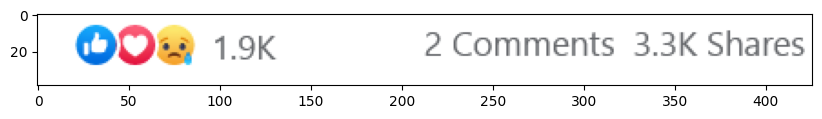

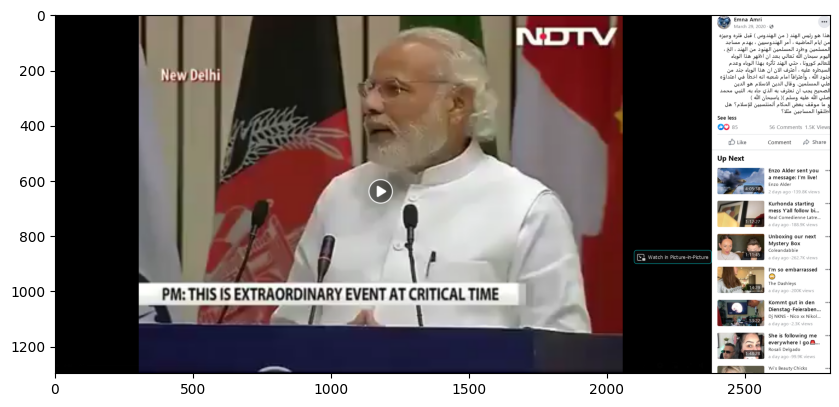

In [3]:
# load ref view for cropping the same type social media posts images.
# substitute the below paths for your samples
path_ref = pkg / "data" / "ref" / "ref-00.png"
ref_view = cv2.imread(path_ref.as_posix())
RGB_ref_view = cv2.cvtColor(ref_view, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 15))
plt.imshow(RGB_ref_view)
plt.show()

path_post = pkg / "data" / "test-crop-image.png"
view = cv2.imread(path_post.as_posix())
RGB_view = cv2.cvtColor(view, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 15))
plt.imshow(RGB_view)
plt.show()

You can now crop the image and check on the way that everything looks fine. `plt_match` will plot the matches on the image and below which line content will be cropped; `plt_crop` will plot the cropped text part of the social media post with the comments removed; `plt_image` will plot the image part of the social media post if applicable.

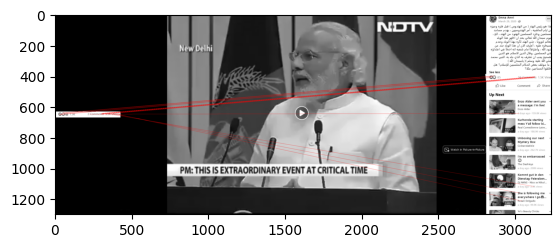

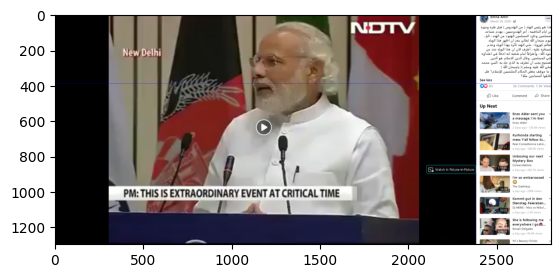

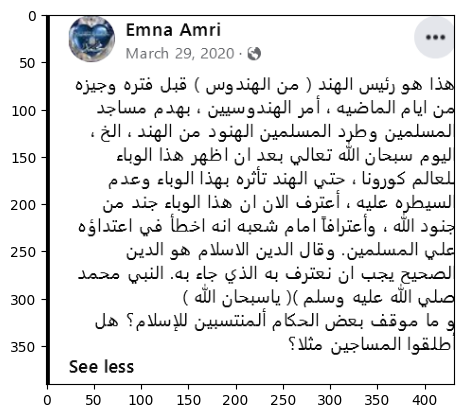

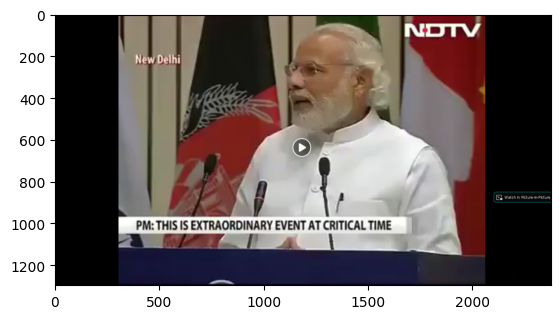

In [4]:
# crop a posts from reference view, check the cropping 
# this will only plot something if the reference is found on the image
crop_view = crpo.crop_posts_from_refs(
    [ref_view], view, 
    plt_match=True, plt_crop=True, plt_image=True,
)

Batch crop images from the image folder given in `crop_dir`. The cropped images will save in `save_crop_dir` folder with the same file name as the original file. The reference images with the items to match are provided in `ref_dir`.

Sometimes the cropping will be imperfect, due to improper matches on the image. It is sometimes easier to first categorize the social media posts and then set different references in the reference folder `ref_dir`.

In [5]:

crop_dir = "data/"
ref_dir = pkg / "data" / "ref" 
save_crop_dir = "data/crop/"

files = utils.find_files(path=crop_dir,limit=10,)
ref_files = utils.find_files(path=ref_dir.as_posix(), limit=100)

crpo.crop_media_posts(files, ref_files, save_crop_dir, plt_match=True, plt_crop=False, plt_image=False)
print("Batch cropping images done")

Doing file data/106349S_por.png


Not enough matches are found - 1/6
Doing file data/102141_2_eng.png


Doing file data/102730_eng.png


Batch cropping images done
